# Завдання
З бібліотеки датасетів Tensorflow за допомогою функції tfds.load завантажте датасет під назвою “cars196”. Застосуйте до зображення із цього датасету аугментаційні перетворення:
- дзеркальне відображення
- зміна насиченості кольорів
- відображення в grayscale
- поворот на 90 градусів
- обрізка по краях
- зміна яскравості

## Рішення

In [17]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

import warnings
warnings.filterwarnings("ignore")

In [18]:
# Завантажуємо датасет cars196
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'cars196',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [19]:
# Функція для отримання назви категорії
get_label_name = metadata.features['label'].int2str

In [20]:
# Витягуємо зображення по номеру
n=2023
for i, (image, label) in enumerate(test_ds):
  if i== n-1:
    break

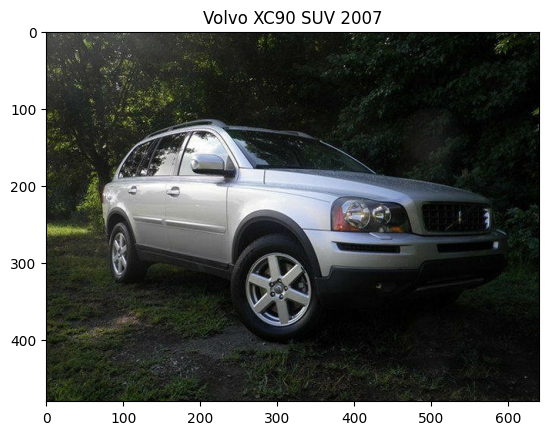

In [21]:
plt.imshow(image)
plt.title(get_label_name(label));

In [10]:
# Функція для відображення зміненого зображення
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    plt.axis("off")

### Зеркальне відображення

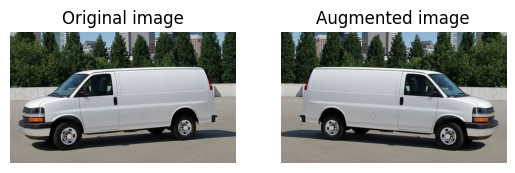

In [8]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

### Зміна насиченості

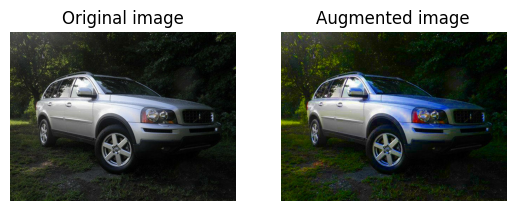

In [12]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

### Відображення в grayscale

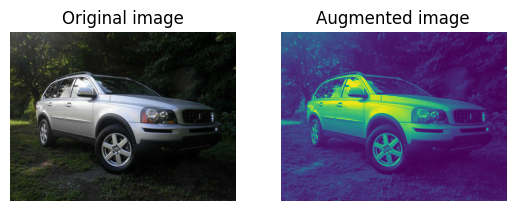

In [13]:
# Відтінки сірого
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image,  tf.squeeze(grayscaled))

### Поворот на 90 градусів

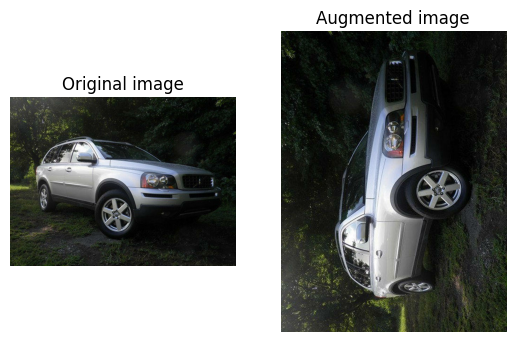

In [14]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

### Обрізка по краях

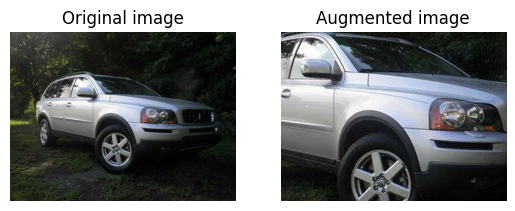

In [15]:
# Обрізання зображення
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image, cropped)

### Зміна яскравості

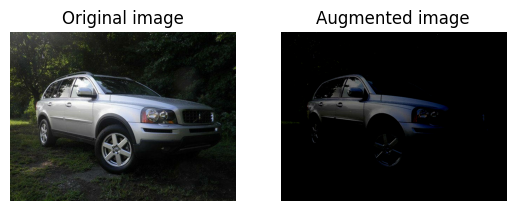

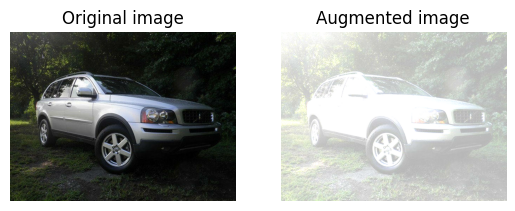

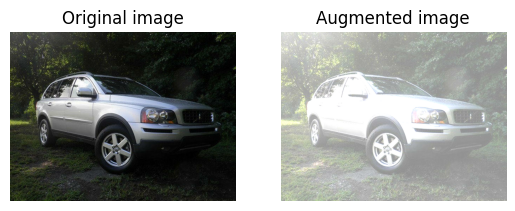

In [16]:
for i in range(3):
  seed = (i, 0)
  stateless_random_brightness = tf.image.stateless_random_brightness(
      image, max_delta=0.95, seed=seed)
  visualize(image, stateless_random_brightness)